In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#to connect a live dataset we need a library called datareader
%pip install pandas_datareader

In [3]:
from pandas_datareader import data as wb

In [4]:
#analysis of 3 companies
ticker = ['BAJFINANCE.NS','M&MFIN.BO','MUTHOOTFIN.NS']
data = pd.DataFrame()
for i in ticker:
    data[i]=wb.DataReader(i, data_source='yahoo', start= '2014-01-01')['Adj Close']
    

In [5]:
data

,BAJFINANCE.NS,M&MFIN.BO,MUTHOOTFIN.NS
Date,,,
2014-01-01,152.649780,293.582092,88.315651
2014-01-02,152.542877,290.288574,89.007523
2014-01-03,151.211105,291.294922,88.844742
2014-01-06,150.817383,289.099182,87.338898
2014-01-07,151.070145,278.806976,87.420296
...,...,...,...
2022-09-19,7496.100098,223.300003,1028.099976
2022-09-20,7635.399902,227.199997,1033.949951
2022-09-21,7690.649902,223.649994,1036.400024


In [6]:
data.iloc[0] #get first days data

BAJFINANCE.NS    152.649780
M&MFIN.BO        293.582092
MUTHOOTFIN.NS     88.315651
Name: 2014-01-01 00:00:00, dtype: float64

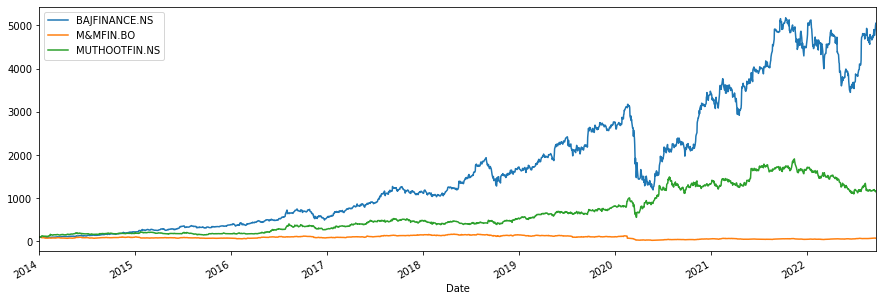

In [7]:
((data/data.iloc[0])*100).plot(figsize=(15,5))

Find returns of the each company

In [8]:
#shift command gives previous value 
returns1 = ((data/data.shift(1))-1)
returns = np.squeeze(np.asarray(returns1))


In [9]:
#consider equal amount invested in all  companies
weights = np.array([0.25,0.25,0.25])
weights

array([0.25, 0.25, 0.25])

In [16]:
#a dot product gives multiplication of two arrays or matrix
np.dot(returns,weights)
#(returns*weights)

array([        nan, -0.00102116, -0.00177315, ..., -0.00150484,
       -0.00427972, -0.03553282])

In [19]:
annual_return = returns.mean()*250
annual_return

nan

In [18]:
#find return on all 3 companies
result = np.dot(annual_return,weights)


In [36]:
round(result,4)*100
print("The overall return for the investment is ",round(result,4)*100,"%")

18.38